#### Song_id = Object
Unique ID for every song in the dataset, in total there are 1000 songs in the dataset
#### User_id = Object 
Unique ID for every user
#### freq = int 
Number of times a song was listened by an user
#### Artist_name = Str 
Name of Artist 
#### Release = Str
Album to which the songs belong to
#### track_id = Str
unique id for each track

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import random
from datetime import datetime

from scipy import sparse
from scipy.sparse import csr_matrix


In [3]:
df = pd.read_csv('kaggle_visible_evaluation_triplets.txt', sep='\t',names=['user_id','song_id','freq'])
df.head()

,user_id,song_id,freq
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1


In [4]:
df.shape

(1450933, 3)

In [5]:
df['user_id'].unique()

array(['fd50c4007b68a3737fe052d5a4f78ce8aa117f3d',
       'd7083f5e1d50c264277d624340edaaf3dc16095b',
       'd68dc6fc25248234590d7668a11e3335534ae4b4', ...,
       'ab79461415bb9db956def3a897886d0754ddddfb',
       'fc072bde2043756ea30ff07e4a5311e34825b4df',
       '5e650759ebf89012044c6d52121eeada8b0ec814'], dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450933 entries, 0 to 1450932
Data columns (total 3 columns):
user_id    1450933 non-null object
song_id    1450933 non-null object
freq       1450933 non-null int64
dtypes: int64(1), object(2)
memory usage: 33.2+ MB


In [7]:
df.describe()

,freq
count,1.450933e+06
mean,3.187149e+00
std,7.051664e+00
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,3.000000e+00
max,9.230000e+02


Here we have information to collect:
+ min=1 so all songs has been listened 1 or more times.
+ max=923 so few popular songs has been played more often than others
+ On average people listened to songs about 3 times.
+ A large standard deviation indicates that the data points can spread far from the mean here std = 7.05 
+ 25th percentile means that 25% of the accepted students made a 1 on the freq.
+ 50th percentile means that 50% of the accepted students made a 1 on the freq. it is also called median
+ 75th percentile means that 75% of the accepted students made a 3 or below on the freq.
+ This also means that there are few frequency of 3 and above

In [8]:
unique_tracks_df = pd.read_csv('unique_tracks.txt', sep='<SEP>',names=['track_id','song_id','artist_name','song_release'])
unique_tracks_df.head()

,track_id,song_id,artist_name,song_release
0,TRMMMYQ128F932D901,SOQMMHC12AB0180CB8,Faster Pussy cat,Silent Night
1,TRMMMKD128F425225D,SOVFVAK12A8C1350D9,Karkkiautomaatti,Tanssi vaan
2,TRMMMRX128F93187D9,SOGTUKN12AB017F4F1,Hudson Mohawke,No One Could Ever
3,TRMMMCH128F425532C,SOBNYVR12A8C13558C,Yerba Brava,Si Vos QuerÃ©s
4,TRMMMWA128F426B589,SOHSBXH12A8C13B0DF,Der Mystic,Tangle Of Aspens


In [9]:
unique_tracks_df.shape

(1000000, 4)

In [10]:
unique_tracks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 4 columns):
track_id        1000000 non-null object
song_id         1000000 non-null object
artist_name     1000000 non-null object
song_release    999985 non-null object
dtypes: object(4)
memory usage: 30.5+ MB


In [11]:
unique_tracks_df.describe()

,track_id,song_id,artist_name,song_release
count,1000000,1000000,1000000,999985
unique,1000000,999056,72665,702059
top,TRJRIDZ12903CE8521,SOJRFWQ12AB0183582,Michael Jackson,Intro
freq,1,3,194,1511


###  Checking the Missing Values

In [12]:
print(sum(df.isnull().any()), sum(unique_tracks_df.isnull().any()))

0 1


In [13]:
unique_tracks_df['song_release'].isnull().sum()

15

In [14]:
duplicated = df.duplicated()
sum(duplicated)

0

In [15]:
duplicated = unique_tracks_df.duplicated()
sum(duplicated)

0

In [16]:
duplicated = unique_tracks_df['song_id'].duplicated()
sum(duplicated)

944

In [17]:
duplicated = unique_tracks_df['artist_name'].duplicated()
sum(duplicated)

927335

In [18]:
duplicated = unique_tracks_df['song_release'].duplicated()
sum(duplicated)

297940

### Merge the DataFrame

In [19]:
merged_df = pd.merge(df, unique_tracks_df, on='song_id', how='left')
merged_df.head(10)

,user_id,song_id,freq,track_id,artist_name,song_release
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1,TRLGMFJ128F4217DBE,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1,TRTNDNE128F1486812,Cartola,Tive Sim
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1,TRASTUE128F930D488,Lonnie Gordon,Catch You Baby (Steve Pitron & Max Sanna Radio...
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1,TRFPLWO128F1486B9E,Miguel Calo,El Cuatrero
5,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOXLOQG12AF72A2D55,1,TRWBSCZ128F932F2F9,Beastie Boys,Unite (2009 Digital Remaster)
6,d7083f5e1d50c264277d624340edaaf3dc16095b,SOUVUHC12A67020E3B,1,TRCQXMT128E0786397,Moby,Lift Me Up
7,d7083f5e1d50c264277d624340edaaf3dc16095b,SOUQERE12A58A75633,1,TRZLFVB128F429FED0,Guano Apes,Living In A Lie
8,d7083f5e1d50c264277d624340edaaf3dc16095b,SOIPJAX12A8C141A2D,1,TRIKCQI128F92DDC16,Guano Apes,Open Your Eyes
9,d7083f5e1d50c264277d624340edaaf3dc16095b,SOEFCDJ12AB0185FA0,2,TRTBQQG128F9339E23,UDG,Kurtizana


In [20]:
merged_df.shape

(1491952, 6)

In [21]:
print('Total data poins:' ,merged_df.shape[0])
print('Total number of unique users: ',merged_df['user_id'].unique().shape[0])
print('Total number of unique songs: ',merged_df['song_id'].unique().shape[0])
print('Total number of unique tracks: ',merged_df['track_id'].unique().shape[0])

Total data poins: 1491952
Total number of unique users:  110000
Total number of unique songs:  163206
Total number of unique tracks:  163828


In [22]:
print('Total number of unique song releases: ',merged_df['song_release'].unique().shape[0])
print('Total number of unique artists: ',merged_df['artist_name'].unique().shape[0])

Total number of unique song releases:  137675
Total number of unique artists:  28367


In [23]:
merged_df.describe()

,freq
count,1.491952e+06
mean,3.179719e+00
std,7.015023e+00
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,3.000000e+00
max,9.230000e+02


### Data Analysis

In [24]:
# Calculate mean freq of top songs
merged_df.groupby('song_release')['freq'].mean().sort_values(ascending=False).head()

song_release
Drop The Hammer (Album Version)    923.0
Believe In Yourself                537.0
SyntymÃ¤pÃ¤ivÃ¤                    307.0
Christian Resistance               193.0
Back To Allentown                  185.0
Name: freq, dtype: float64

In [25]:
# Calculate mean freq of artist
merged_df.groupby('artist_name')['freq'].mean().sort_values(ascending=False).head()

artist_name
Kilgore                        462.0
Merle Travis And Joe Maphis    131.0
The Family Stand               125.0
Giuseppe Di Stefano            117.0
Mousse T.                      112.0
Name: freq, dtype: float64

In [26]:
# Calculate count rating of all songs
merged_df.groupby('song_release')['freq'].count().sort_values(ascending=False).head()

song_release
Sehr kosmisch                     5043
Undo                              4483
You're The One                    4270
Use Somebody                      3822
Dog Days Are Over (Radio Edit)    3780
Name: freq, dtype: int64

In [27]:
merged_df.groupby('artist_name')['freq'].count().sort_values(ascending=False).head()

artist_name
Coldplay                  13675
Kings Of Leon             11586
Justin Bieber              9259
Florence + The Machine     8213
Eminem                     8160
Name: freq, dtype: int64

In [28]:
merged_df.loc[merged_df['artist_name'] == 'Coldplay', 'song_release'].unique()

array(['Yellow', 'The Scientist', 'Fix You', "Don't Panic", 'Sparks',
       'Clocks', 'Life In Technicolor ii', 'Such A Rush',
       'Fix You (Live)', 'Speed Of Sound', 'Lost!',
       'God Put A Smile Upon Your Face', 'Brothers & Sisters',
       'A Rush Of Blood To The Head', 'Clocks (Live In Sydney)',
       'One I Love', 'For You', 'You Only Live Twice (Live From Norway)',
       'Shiver', 'Swallowed In The Sea', 'In My Place',
       'Postcards From Far Away', 'Glass Of Water',
       "Things I Don't Understand", 'Strawberry Swing', '42',
       'Til Kingdom Come', 'The Goldrush', 'X & Y', 'Life In Technicolor',
       'We Never Change', 'Bigger Stronger', 'What If', 'Trouble',
       "Everything's Not Lost (Includes Hidden Track 'Life Is For Living')",
       'Only Superstition', 'Politik', 'Careful Where You Stand',
       'Warning Sign', 'See You Soon', 'Spies', 'Cemeteries Of London',
       'A Whisper', 'A Message', 'Square One', 'Low', 'I Bloom Blaum',
       'I Ran Away',

In [29]:
# Calculate count rating of all movies
merged_df.groupby(merged_df['artist_name'] == 'Justin Bieber')['freq'].count().sort_values(ascending=False).head()

artist_name
False    1482693
True        9259
Name: freq, dtype: int64

In [30]:
merged_df.loc[merged_df['artist_name'] == 'Justin Bieber', 'song_release'].unique()

array(['Somebody To Love', 'Down To Earth', 'One Time', 'U Smile',
       'Favorite Girl', 'Love Me', 'Common Denominator',
       'Never Let You Go', 'Stuck In The Moment', 'Up',
       'One Less Lonely Girl', 'That Should Be Me', 'Bigger',
       'Runaway Love'], dtype=object)

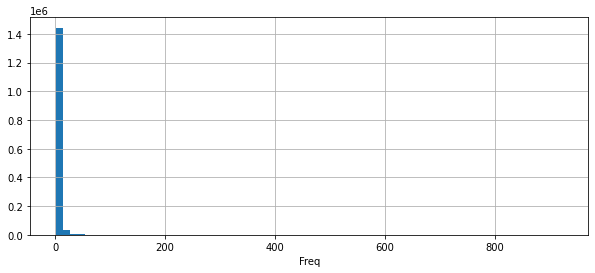

In [31]:
# plot graph of 'num of ratings column'
plt.figure(figsize =(10, 4))
  
merged_df['freq'].hist(bins = 70)
plt.xlabel('Freq')
plt.show()

In [32]:
songs_per_user=merged_df.groupby(['user_id'])['freq'].sum()
songs_per_user.head()

user_id
00007a02388c208ea7176479f6ae06f8224355b3     13
00014a76ed063e1a749171a253bca9d9a0ff1782     24
00015189668691680bb1a2e58afde1541ec92ced    101
0001ff7aa2667c8d8b945317b88adaed1c0b9dc2     12
00020fcd8b01986a6a85b896ccde6c49f35142ad     44
Name: freq, dtype: int64

In [33]:
songs_per_user.sort_values().head()

user_id
1858b9d771784f35b11587d4848604d5686e2e6a    5
105e070c30b924ad8c12dfc93879510fffce9e9f    5
473faa31a070d046588438a24838ee2ea59ba75a    5
4117443d6ef69fdf555b736782bed19a2bf73218    5
23a0d4a8ba71eef8abd4e4e4dd83060952c703f7    5
Name: freq, dtype: int64

In [34]:
songs_per_user.sort_values().tail()

user_id
957440a77858369fb7a6bcc6fa408fc187d5bd7b    1187
c6150292374fb1dad89982367b3245dd5004c718    1192
1c5aa998482a40abfd020759e7d757eb6c510e72    1213
090b841eaf56d343a26625c2c6d08b823927bc4f    1305
938c2632d43eeadb8a83a7cc254d014f9cea6afe    1369
Name: freq, dtype: int64

In [35]:
songs_per_user.describe()

count    110000.000000
mean         43.127164
std          54.818120
min           5.000000
25%          13.000000
50%          26.000000
75%          51.000000
max        1369.000000
Name: freq, dtype: float64

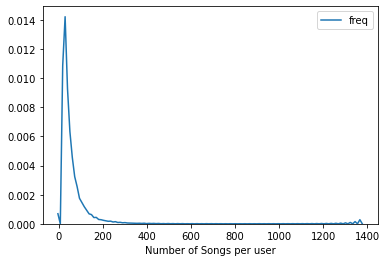

In [36]:
plt.xlabel('Number of Songs per user')
sns.kdeplot(songs_per_user)
plt.show()

In [37]:
merged_df[['song_release', 'freq']].groupby('song_release').sum().sort_values(by='freq', ascending=False)[:10]

,freq
song_release,
You're The One,35738
Undo,33179
Revelry,24359
Sehr kosmisch,19454
Horn Concerto No. 4 in E flat K495: II. Romance (Andante cantabile),17115
Dog Days Are Over (Radio Edit),14279
Secrets,12492
Ain't Misbehavin,11610
Somebody To Love,11377


In [38]:
def flatten_cols(df):
  df.columns = [' '.join(col).strip() for col in df.columns.values]
  return df
pd.DataFrame.flatten_cols = flatten_cols

In [39]:
song_ratings = unique_tracks_df.merge(merged_df.groupby('song_id', as_index=False).agg({'freq': ['count', 'mean']}).flatten_cols(),on='song_id')

In [40]:
sorted_song = (song_ratings[['song_release', 'freq count', 'freq mean']].sort_values('freq count', ascending=False))

In [41]:
sorted_song.head(10)

,song_release,freq count,freq mean
132516,Sehr kosmisch,5043,3.857624
18379,Undo,4483,7.401071
73958,You're The One,4136,8.566731
67750,Use Somebody,3822,2.858713
67751,Use Somebody,3822,2.858713
25073,Dog Days Are Over (Radio Edit),3780,3.777513
141909,Revelry,3672,6.633715
141474,Secrets,3430,3.612828
101714,Horn Concerto No. 4 in E flat K495: II. Romanc...,3272,5.230746
32541,Somebody To Love,3180,3.246541


In [42]:
merged_df[['user_id','artist_name', 'freq']].groupby('artist_name').sum().sort_values(by='freq', ascending=False)[:10]

,freq
artist_name,
Kings Of Leon,43775
Coldplay,36203
Dwight Yoakam,35688
BjÃ¶rk,35210
Justin Bieber,31295
Florence + The Machine,28224
Eminem,22914
Muse,22645
Taylor Swift,21844


In [43]:
artist_popularity=merged_df.groupby(['artist_name'])['freq'].sum().sort_values()
artist_popularity.head()

artist_name
Housecrafters                                        1
Theola Kilgore                                       1
Billy Grammer                                        1
Billy Higgins_ Bob Berg_ Cedar Walton_ Tony Dumas    1
Theophilus London                                    1
Name: freq, dtype: int64

In [44]:
artist_popularity.head()

artist_name
Housecrafters                                        1
Theola Kilgore                                       1
Billy Grammer                                        1
Billy Higgins_ Bob Berg_ Cedar Walton_ Tony Dumas    1
Theophilus London                                    1
Name: freq, dtype: int64

In [45]:
artist_popularity.tail()

artist_name
Justin Bieber    31295
BjÃ¶rk           35210
Dwight Yoakam    35688
Coldplay         36203
Kings Of Leon    43775
Name: freq, dtype: int64

In [46]:
sorted_artist_popularity = artist_popularity.sort_values(ascending=False )

In [47]:
sorted_artist_popularity.head()

artist_name
Kings Of Leon    43775
Coldplay         36203
Dwight Yoakam    35688
BjÃ¶rk           35210
Justin Bieber    31295
Name: freq, dtype: int64

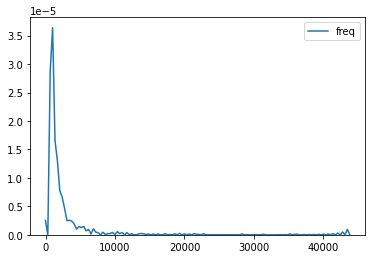

In [48]:
# plt.xlabel('Artist')
# plt.ylabel('Popularity')
sns.kdeplot(sorted_artist_popularity)
plt.show()

In [49]:
song_popularity=merged_df.groupby(['song_release'])['freq'].sum().sort_values()
song_popularity.head()

song_release
The Story Of Jazz               1
Penny Dreadful                  1
That Was Then                   1
Penny Arcade                    1
Hurt of Intention (Original)    1
Name: freq, dtype: int64

In [50]:
song_popularity.tail(20)

song_release
Tive Sim                                                                7896
The Gift                                                                7999
Love Story                                                              8076
Fireflies                                                               8155
Hey_ Soul Sister                                                        8718
SinceritÃ© Et Jalousie                                                  8972
ReprÃ©sente                                                             9685
Canada                                                                  9927
Catch You Baby (Steve Pitron & Max Sanna Radio Edit)                   10515
Invalid                                                                10794
Use Somebody                                                           10926
Somebody To Love                                                       11377
Ain't Misbehavin                                               

In [51]:
sorted_song_popularity = song_popularity.sort_values(ascending=False)

In [53]:
sorted_song_popularity.head()

song_release
You're The One                                                         35738
Undo                                                                   33179
Revelry                                                                24359
Sehr kosmisch                                                          19454
Horn Concerto No. 4 in E flat K495: II. Romance (Andante cantabile)    17115
Name: freq, dtype: int64

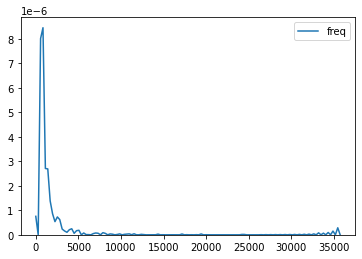

In [54]:
sns.kdeplot(sorted_song_popularity)
plt.show()

<AxesSubplot:xlabel='song_release'>

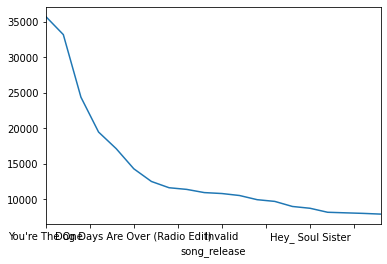

In [56]:
sorted_song_popularity[:20].plot()

<AxesSubplot:xlabel='song_release'>

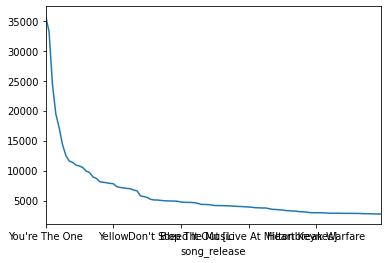

In [57]:
sorted_song_popularity[:100].plot()

<AxesSubplot:>

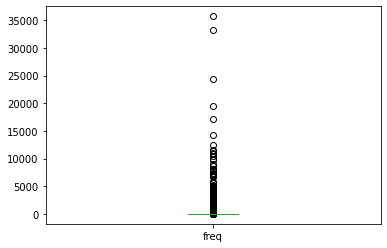

In [58]:
sorted_song_popularity.plot.box()